In [1]:
# Copyright (c) 2025 Florian Dima

# All rights reserved.

# This source code and any associated documentation files are the exclusive
# property of the copyright holder.

# No part of this software may be reproduced, distributed, transmitted,
# modified, or used in any form or by any means, without prior written
# permission from the copyright holder.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install pypalettes
from pypalettes import load_cmap

/kaggle/input/hahe-statistics-all-programmes/hahe_all_21_24.csv


In [54]:
df = pd.read_csv("/kaggle/input/hahe-statistics-all-programmes/hahe_all_21_24.csv")
YEARS = ["2020-2021", "2021-2022", "2022-2023", "2023-2024"]
METRICS = ["enrolled", "graduate", "active", "registered"]
cmap = load_cmap("Pastel")

In [55]:
def plot_stats_by_major(program_themes:  List[str]):
    if len(program_themes) > 1:
        themes = "|".join(program_themes)
    else:
        themes = program_themes[0]
    df_filtered = df[df["program"].str.contains(themes, na=False)]
    programs_num = df_filtered.groupby("institution")["program"].nunique().reset_index(name="unique_programs").sum()['unique_programs']
    print(f"The number of {program_themes[0].title()} themed departments is {programs_num}")
    
    graduates = []
    enrolled = []
    active = []
    registered = []
    
    for year in YEARS:
        graduates.append(df_filtered[df_filtered["academic_year"] == year]["graduate"].sum())
        enrolled.append(df_filtered[df_filtered["academic_year"] == year]["enrolled"].sum())
        active.append(df_filtered[df_filtered["academic_year"] == year]["active"].sum())
        registered.append(df_filtered[df_filtered["academic_year"] == year]["registered"].sum())
    
    plt.figure(figsize=(8,5))
    
    plt.plot(YEARS,graduates, marker='o', label="Graduates")
    plt.plot(YEARS, enrolled, marker='o', label="Enrolled")
    
    plt.xlabel("Academic Year")
    plt.ylabel("Number of Students")
    plt.title(f"{program_themes[0].title()} – Graduates & Enrolled Students per Academic Year")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(YEARS, active, marker='o', label="Active")
    plt.plot(YEARS, registered, marker='o', label="Registered")
    plt.xlabel("Academic Year")
    plt.ylabel("Number of Students")
    plt.title(f"{program_themes[0].title()} – Active & Registered Students per Academic Year")
    plt.grid(True)
    plt.legend()
    plt.show()

The number of Law themed departments is 3


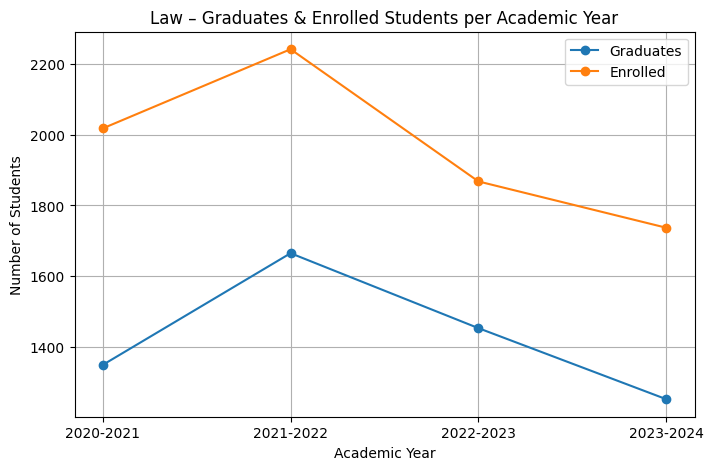

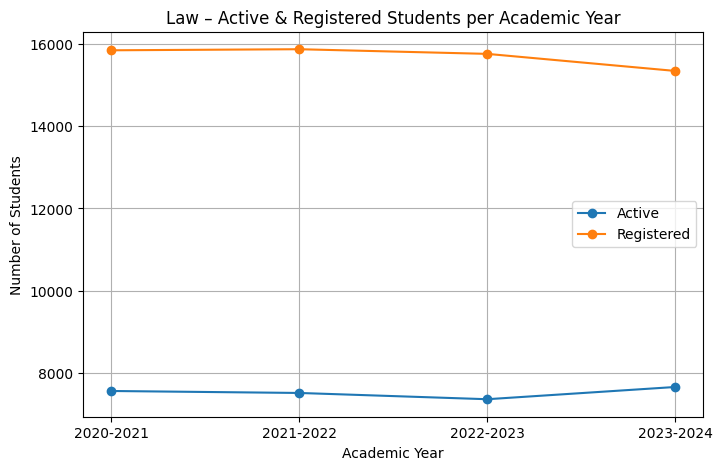

The number of Informatics themed departments is 30


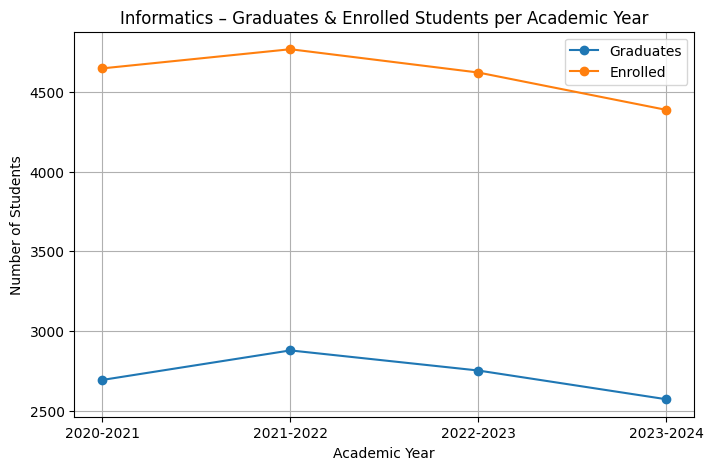

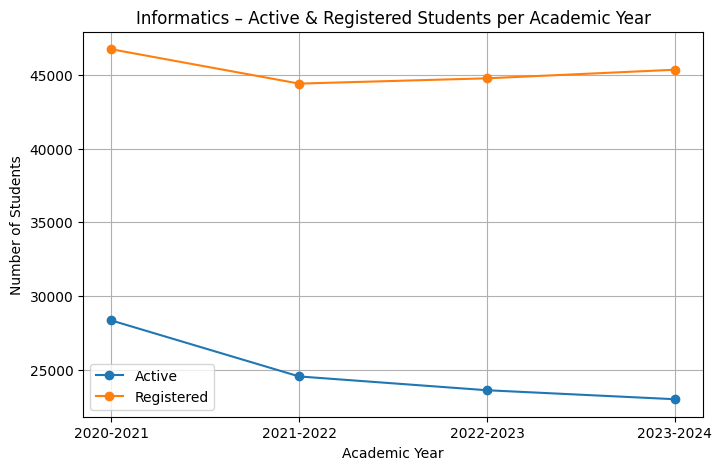

The number of Medicine themed departments is 10


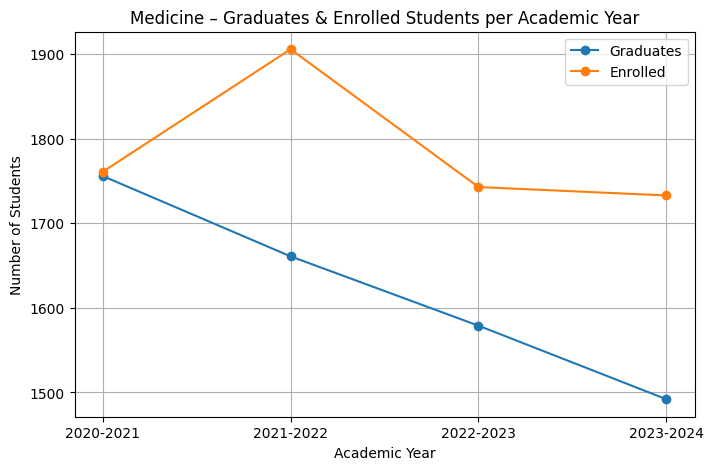

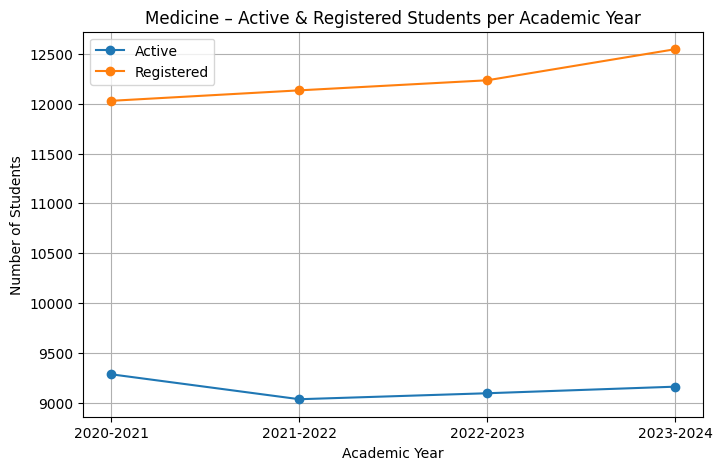

The number of Engineering themed departments is 110


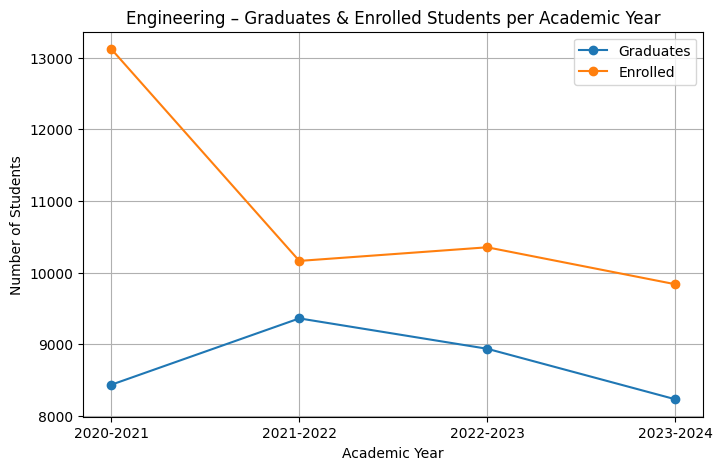

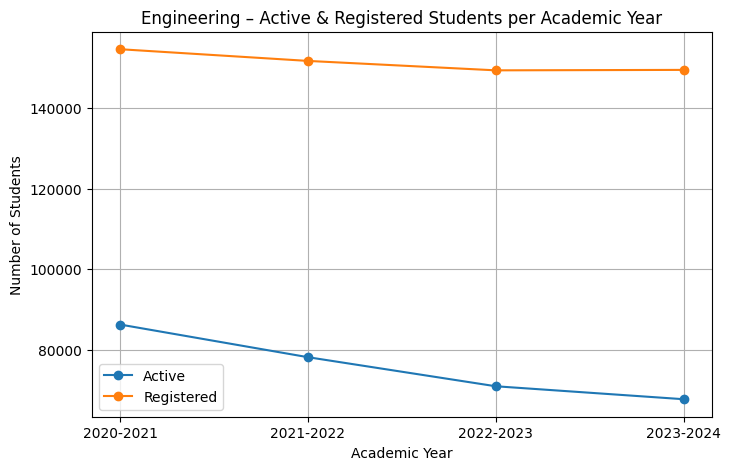

The number of Business themed departments is 26


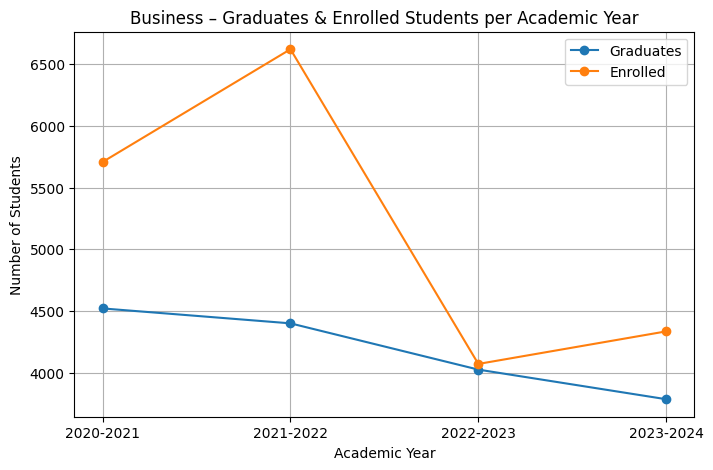

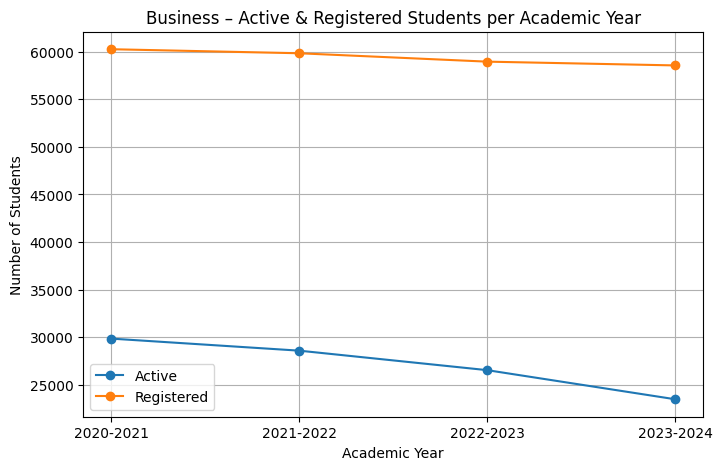

The number of Marketing themed departments is 2


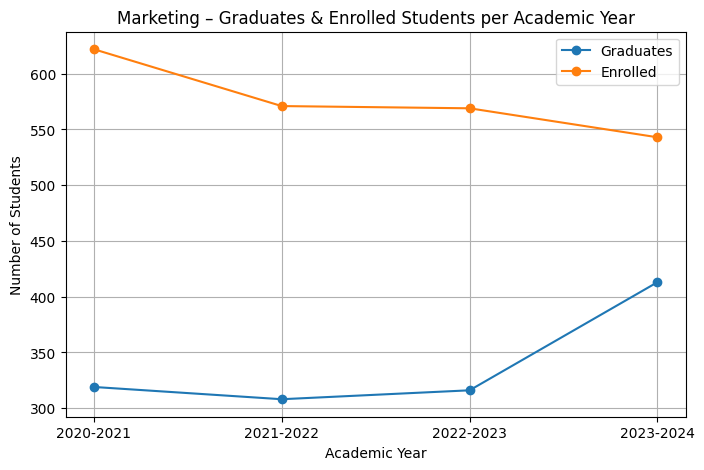

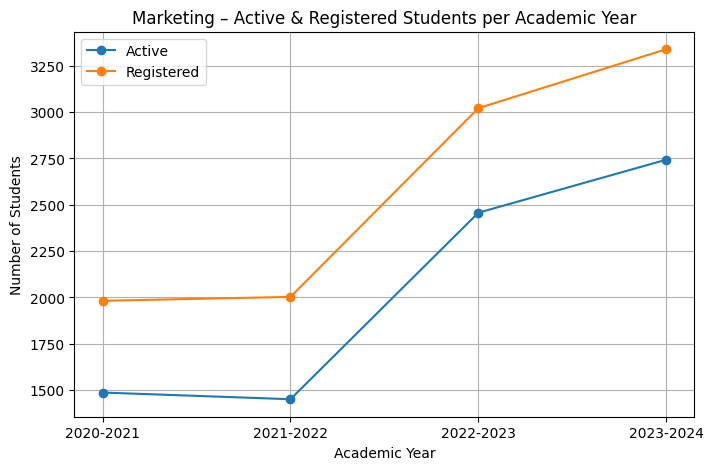

The number of Literature themed departments is 11


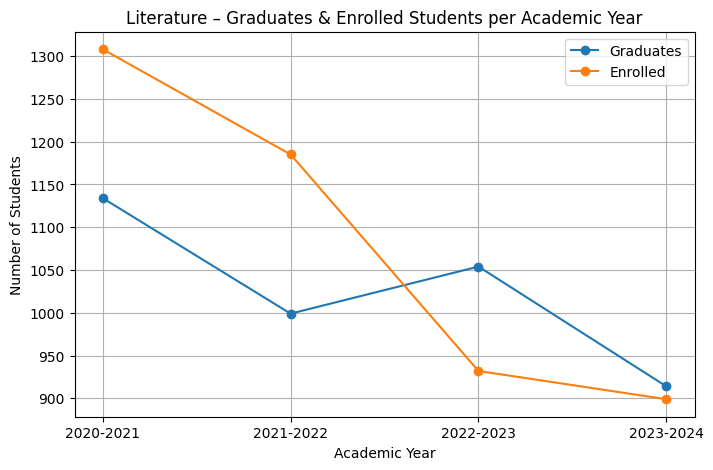

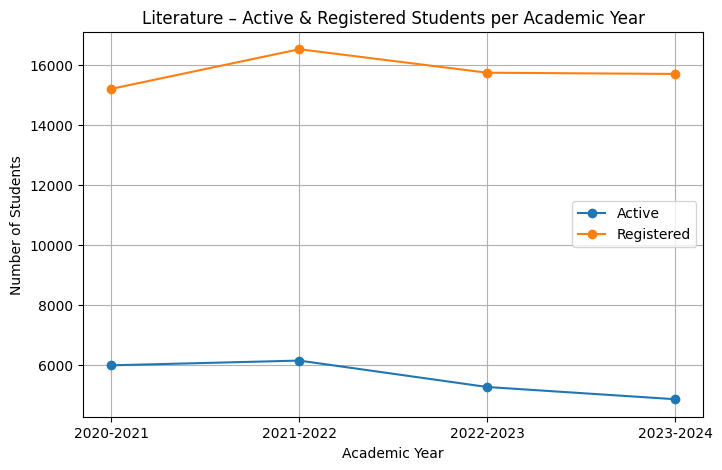

The number of Psychology themed departments is 8


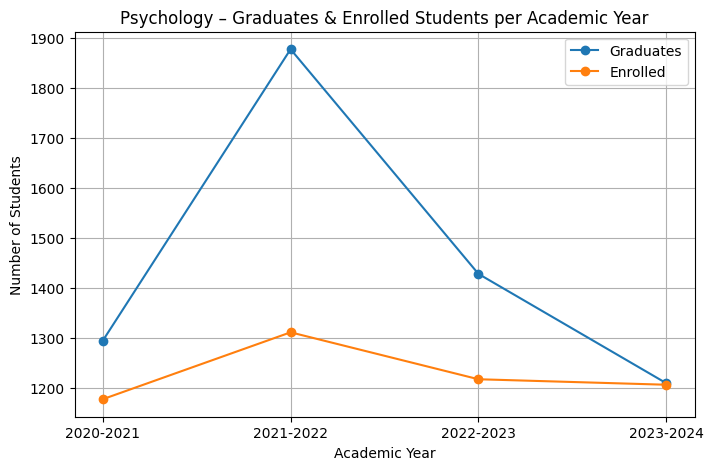

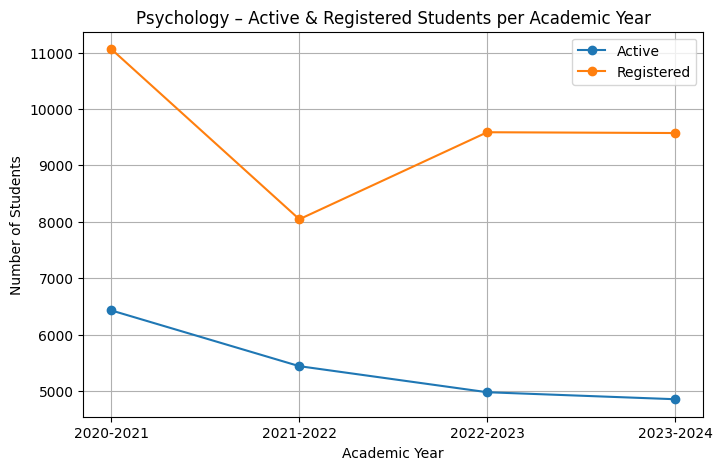

The number of Economics themed departments is 38


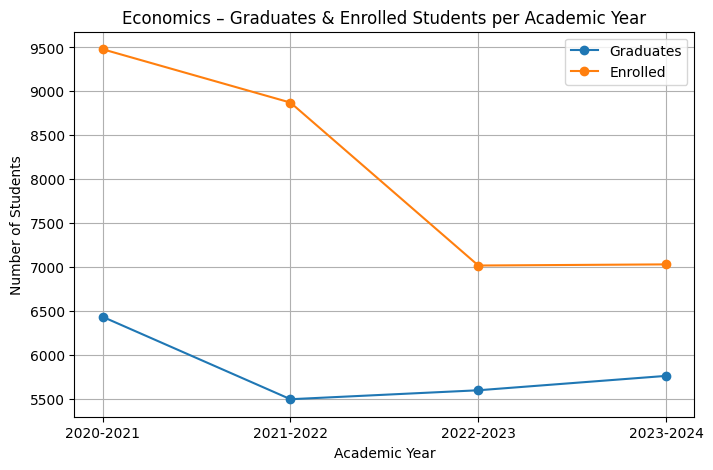

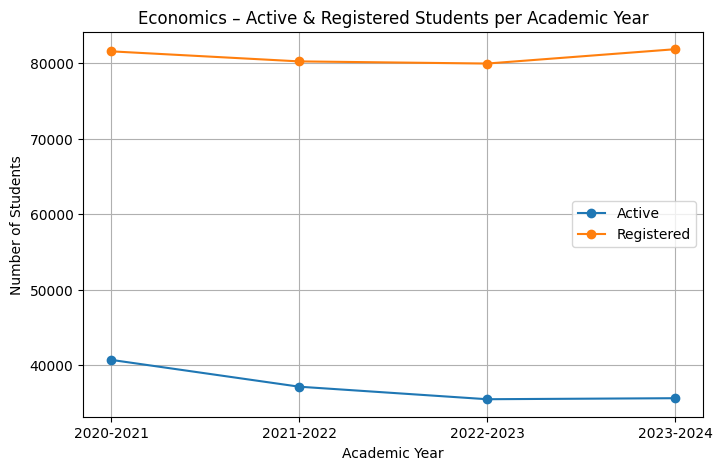

The number of Military Sciences themed departments is 3


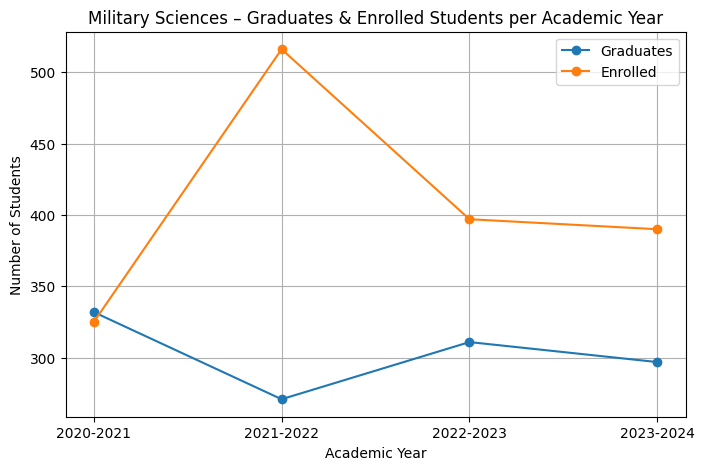

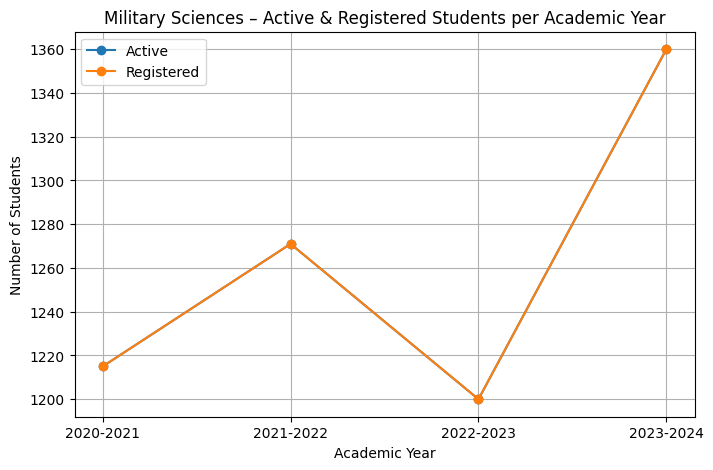

In [56]:
majors = [
    ["Law"],
    ["Informatics", "Computer Science"],
    ["Medicine"],
    ["Engineering"],
    ["Business"],
    ["Marketing", "Market"],
    ["Literature"],
    ["Psychology"],
    ["Economics", "Finance", "Financial", "Econom", "Accounting"],
    ["Military Sciences", "Aviation Sciences", "Naval Sciences"]
]

for m in majors:
    plot_stats_by_major(m)

In [57]:
def calc_active_rate(df_filtered):
    pct = []
    for year in YEARS:
        active = df_filtered[df_filtered["academic_year"] == year]["active"].sum()
        registered = df_filtered[df_filtered["academic_year"] == year]["registered"].sum()
        
        if registered == 0:
            pct.append(0)
        else:
            pct.append((active / registered) * 100)
    return pct

def calc_graduate_rate(df_filtered):
    pct = []
    for year in YEARS:
        graduate = df_filtered[df_filtered["academic_year"] == year]["graduate"].sum()
        active = df_filtered[df_filtered["academic_year"] == year]["active"].sum()
        if active == 0:
            pct.append(0)
        else:
            pct.append((graduate / active) * 100)
    return pct

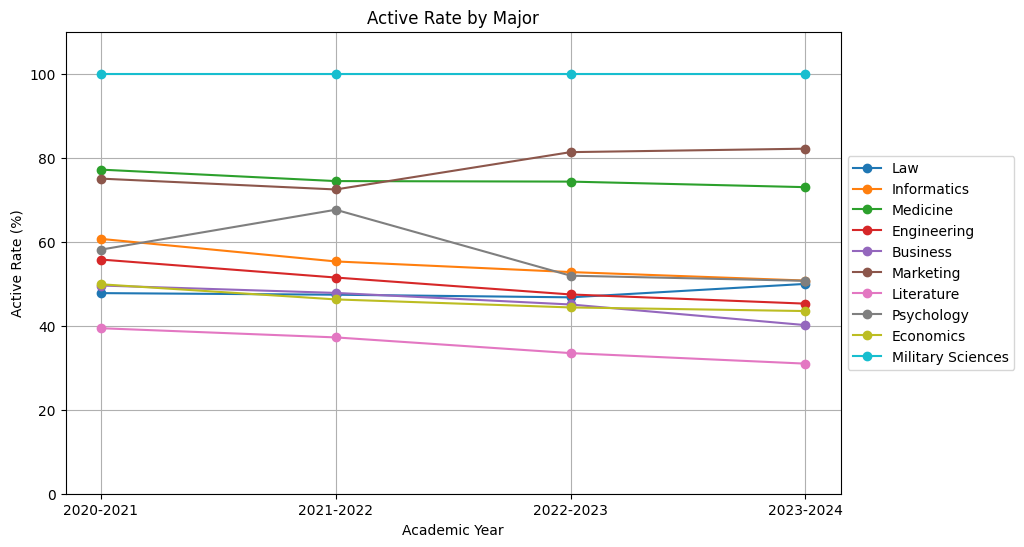

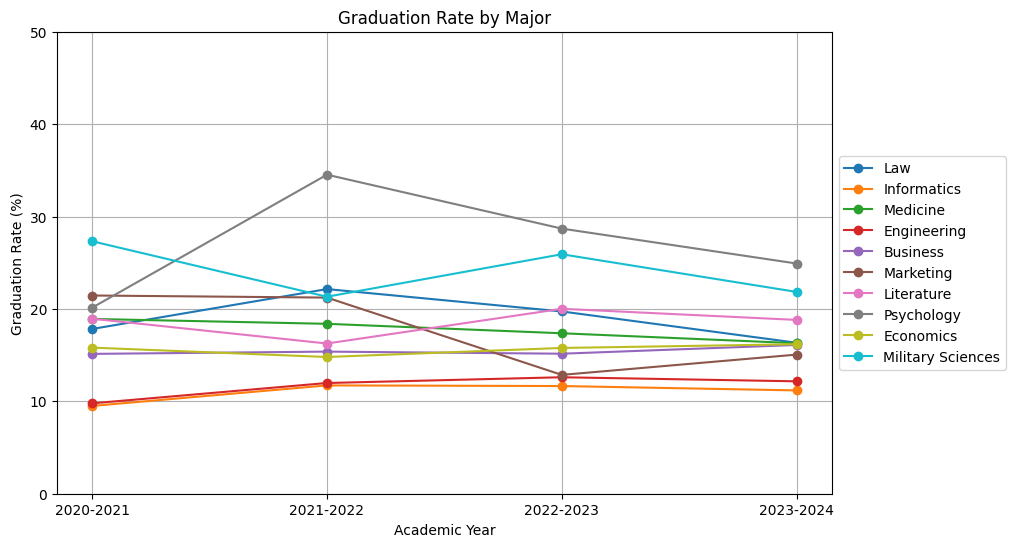

In [58]:
act_rates = []
grad_rates = []
for m in majors:
    if len(m) > 1:
        program_major = "|".join(m)
    else:
        program_major = m[0]
    df_filtered = df[df["program"].str.contains(program_major, na=False, regex=True)]
    act_rates.append(calc_active_rate(df_filtered))
    grad_rates.append(calc_graduate_rate(df_filtered))

plt.figure(figsize=(10,6))

for m, rate in zip (majors, act_rates):
    plt.plot(YEARS, rate, marker='o', label=m[0])

plt.xlabel("Academic Year")
plt.ylabel("Active Rate (%)")
plt.title("Active Rate by Major")
plt.grid(True)
plt.ylim(0, 110)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


plt.figure(figsize=(10,6))

for m, rate in zip (majors, grad_rates):
    plt.plot(YEARS, rate, marker='o', label=m[0])

plt.xlabel("Academic Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate by Major")
plt.grid(True)
plt.ylim(0, 50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [59]:
df['established'] = pd.to_datetime(
    df['established'], 
    format="%d/%m/%Y" # Correct format for day/month/year
)
# The established date defined here is not the correct one, since this code finds the oldest estsablished program
# An instituion's might be established date earlier, with programmes that currectly are not offered
df_grouped = (
    df.groupby(['institution', 'academic_year'], as_index=False)
      .agg({
          'established': 'min', 
          'program': 'count',
          'graduate': 'sum',
          'registered': 'sum',
          'enrolled': 'sum',
          'active': 'sum'
      })
)
df_grouped

,institution,academic_year,established,program,graduate,registered,enrolled,active
0,Agricultural University of Athens,2020-2021,1985-03-28,12,701,13442,1532,7900
1,Agricultural University of Athens,2021-2022,1985-03-28,12,911,13318,832,7232
2,Agricultural University of Athens,2022-2023,1985-03-28,12,907,13225,923,6897
3,Agricultural University of Athens,2023-2024,1985-03-28,12,883,12846,883,6490
4,Aristotle University of Thessaloniki,2020-2021,1917-09-14,42,7327,73948,9095,42220
...,...,...,...,...,...,...,...,...
107,University of Western Macedonia,2023-2024,1976-10-14,35,2481,39041,3385,15894
108,University of the Aegean,2020-2021,1984-03-20,18,1606,17163,3132,11353
109,University of the Aegean,2021-2022,1984-03-20,18,1702,17688,2327,10830
110,University of the Aegean,2022-2023,1984-03-20,18,1308,17688,2102,10712


In [60]:
df_inspect = df_grouped[df_grouped['academic_year'] == '2020-2021']
metric = 'graduate'
total_metric = df_inspect[metric].sum()
print(total_metric)

top_10 = df_inspect.sort_values(by=metric, ascending=False).head(10)
other = df_inspect.sort_values(by=metric, ascending=False).tail(len(df_inspect) - 10)
institutions = np.concatenate([top_10["institution"], ["Other"]])
values, insts = np.concatenate([top_10[metric], [other[metric].sum()]]), institutions
values_prcs = list(map(lambda v: v * 100 / total_metric, values))

56728


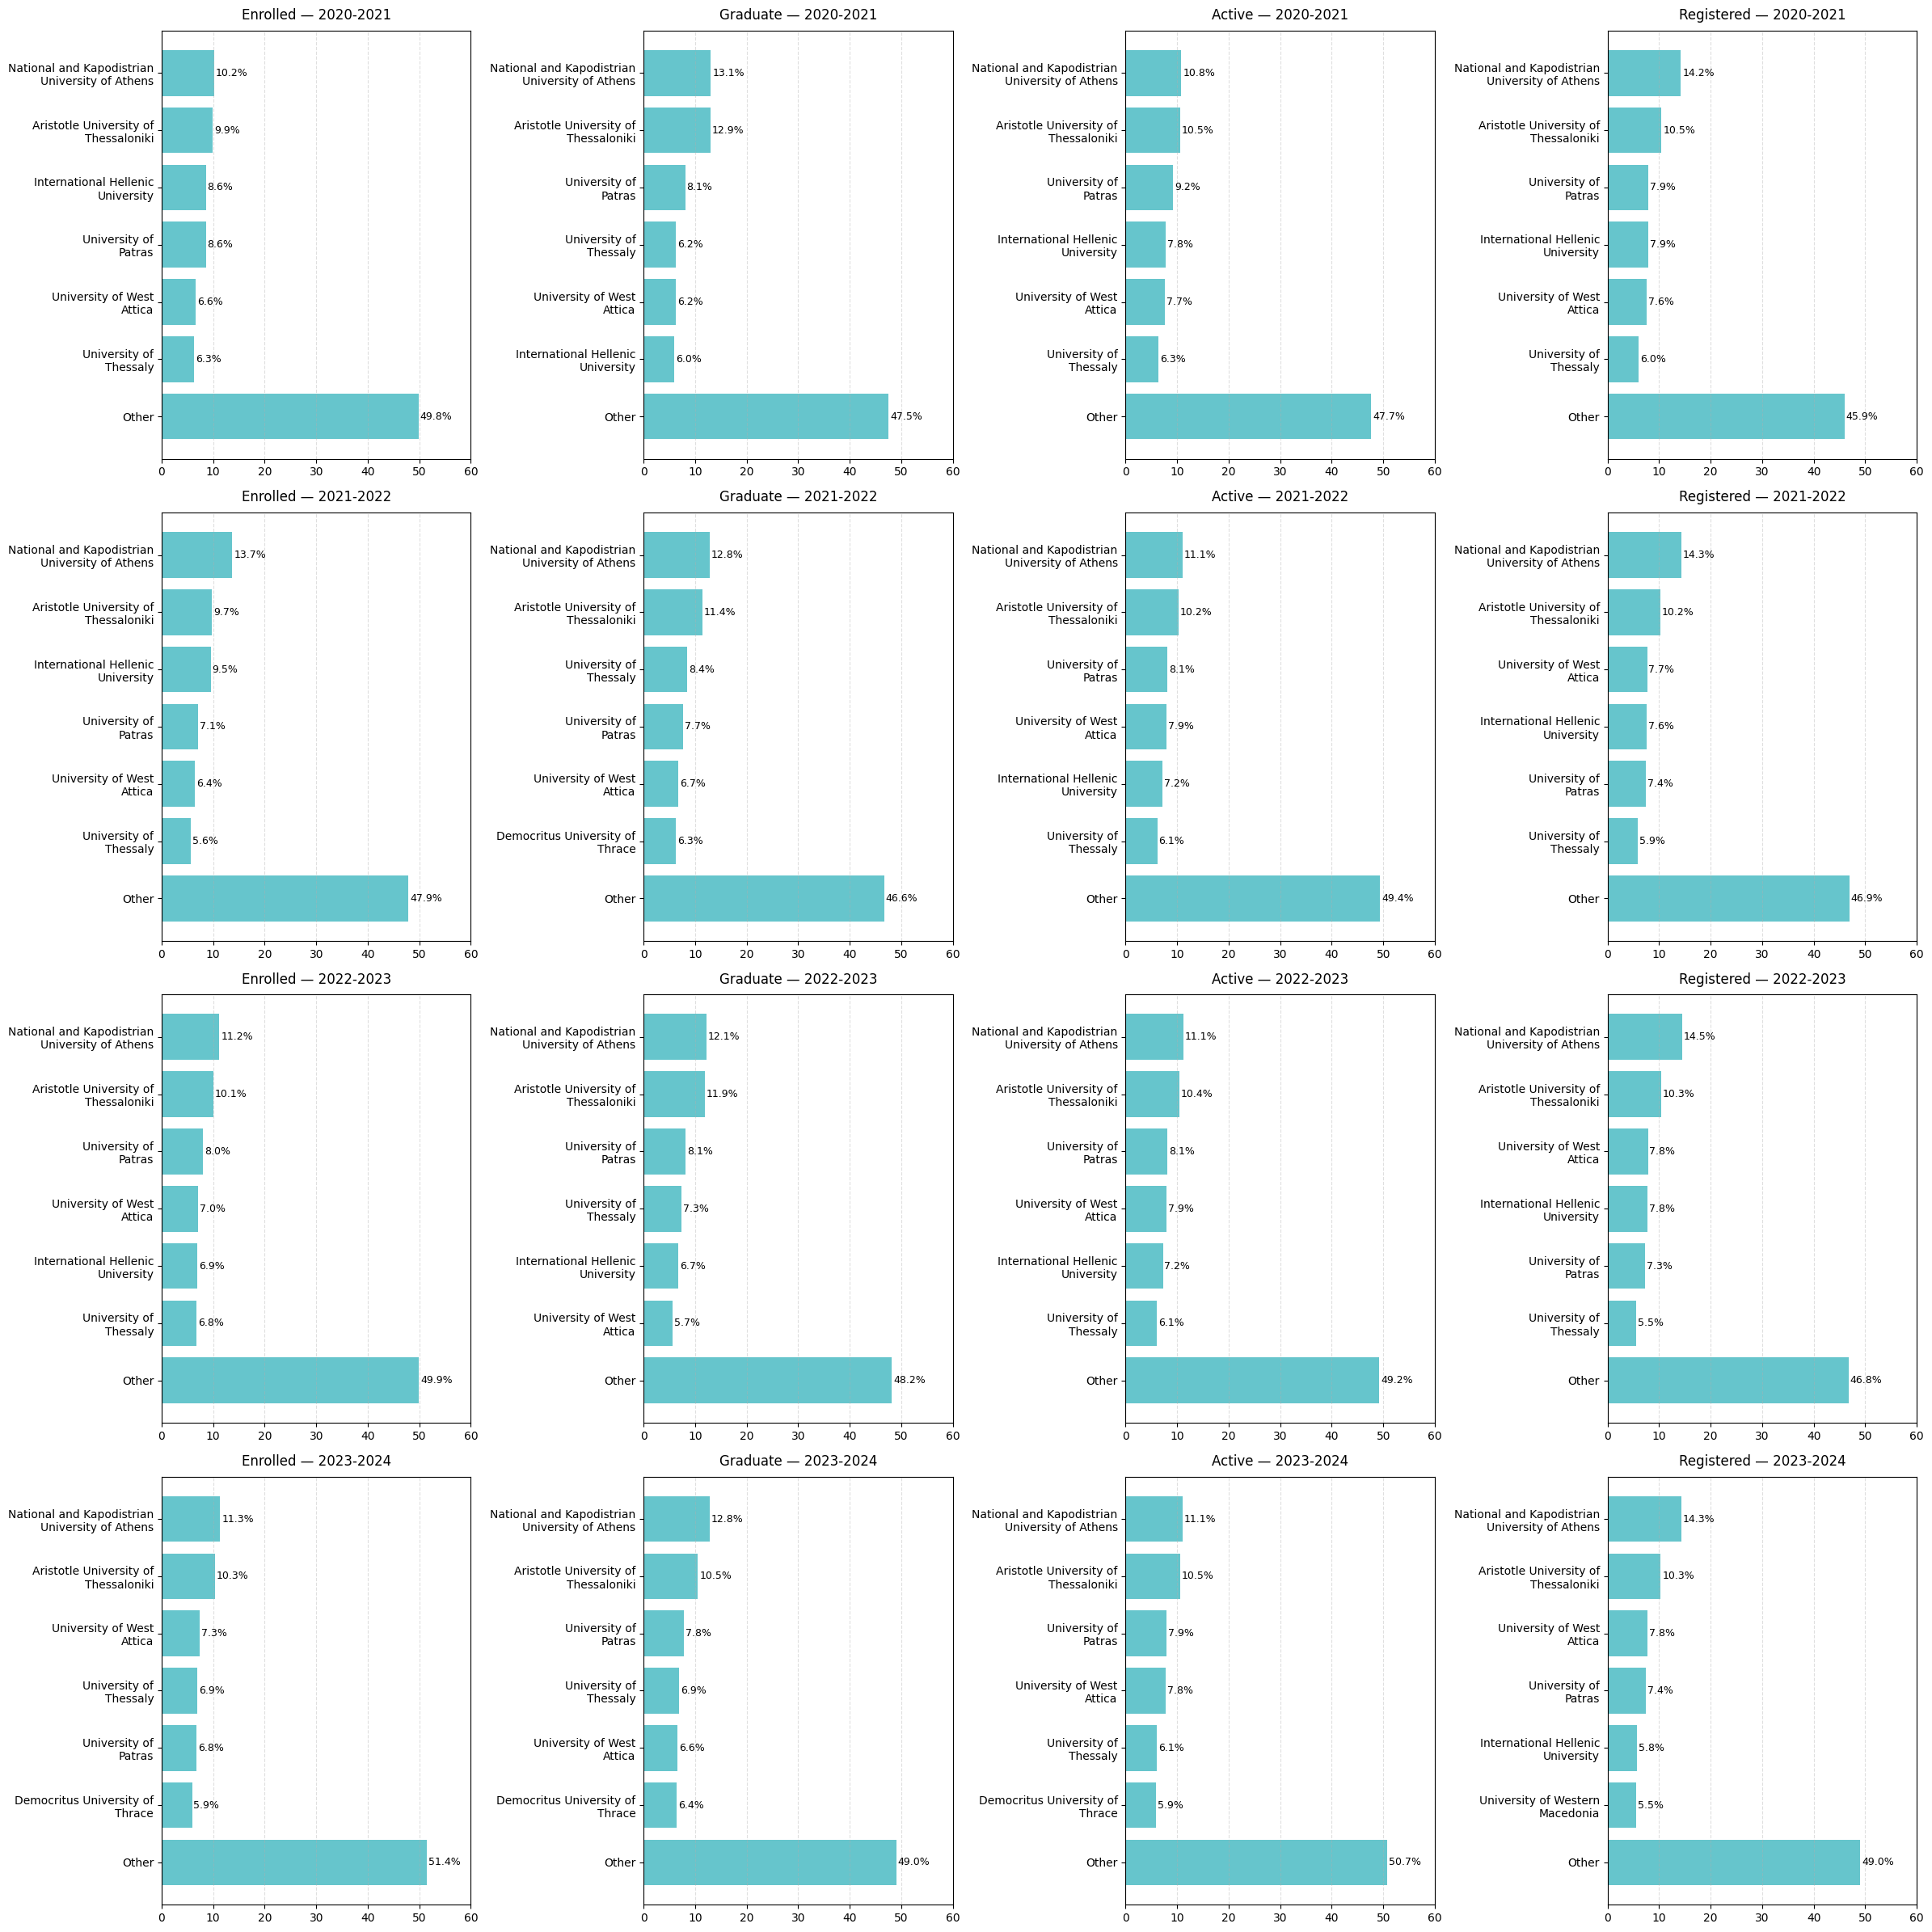

In [61]:
def wrap_label(label, words_per_line=3):
    words = label.split()
    return "\n".join(
        [" ".join(words[i:i + words_per_line]) for i in range(0, len(words), words_per_line)]
    )

def plot_bar_metrics(df):
    # Build consistent global color mapping
    cmap_global = cmap.colors
    
    n_years = len(YEARS)
    n_metrics = len(METRICS)

    fig, axes = plt.subplots(n_years, n_metrics, figsize=(6 * n_metrics, 6 * n_years))

    if n_years == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, year in enumerate(YEARS):
        df_filtered = df[df["academic_year"] == year]
        
        for j, metric in enumerate(METRICS):
            ax = axes[i, j]
            
            sum_metric = df_filtered[metric].sum()
            top_6 = df_filtered.sort_values(by=metric, ascending=False).head(6)
            other = df_filtered.sort_values(by=metric, ascending=False).tail(len(df_filtered) - 6)
            institutions = np.concatenate([top_6["institution"], ["Other"]])
            values, institutions = np.concatenate([top_6[metric], [other[metric].sum()]]), institutions
            values_prcs = list(map(lambda v: v * 100 / sum_metric, values))

            y_pos = np.arange(len(institutions))
            bars = ax.barh(y_pos, values_prcs, align="center", color=cmap.colors[0])

            # Wrap labels for Y-axis
            wrapped_labels = []
            for inst in institutions:
                wpl = 3
                if len(inst.split()) == 3:
                    wpl = 2
                wrapped_labels.append(wrap_label(inst, wpl))

            ax.set_yticks(y_pos)
            ax.set_yticklabels(wrapped_labels)

            for bar in bars:
                width = bar.get_width()
                ax.text(
                    width + 0.3,           # small offset to the right
                    bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}%',       # formatted value
                    va='center',           # vertical alignment
                    fontsize=9
                )

            # Titles + styling
            ax.set_title(f"{metric.title()} — {year}", pad=10)
            ax.invert_yaxis()  # highest first
            ax.grid(axis="x", linestyle="--", alpha=0.4)
            ax.set_xlim(0, 60)

    plt.tight_layout()
    plt.show()

# Call it
plot_bar_metrics(df_grouped)

In [62]:
def add_rates(df):
    df = df.copy()
    df["active_rate"] = (df["active"] / df["registered"]) * 100
    df["graduate_rate"] = (df["graduate"] / df["active"]) * 100
    return df

In [63]:
df_grouped_rates = add_rates(df_grouped)
df_grouped_rates

,institution,academic_year,established,program,graduate,registered,enrolled,active,active_rate,graduate_rate
0,Agricultural University of Athens,2020-2021,1985-03-28,12,701,13442,1532,7900,58.771016,8.873418
1,Agricultural University of Athens,2021-2022,1985-03-28,12,911,13318,832,7232,54.302448,12.596792
2,Agricultural University of Athens,2022-2023,1985-03-28,12,907,13225,923,6897,52.151229,13.150645
3,Agricultural University of Athens,2023-2024,1985-03-28,12,883,12846,883,6490,50.521563,13.605547
4,Aristotle University of Thessaloniki,2020-2021,1917-09-14,42,7327,73948,9095,42220,57.094174,17.354334
...,...,...,...,...,...,...,...,...,...,...
107,University of Western Macedonia,2023-2024,1976-10-14,35,2481,39041,3385,15894,40.711047,15.609664
108,University of the Aegean,2020-2021,1984-03-20,18,1606,17163,3132,11353,66.148109,14.146041
109,University of the Aegean,2021-2022,1984-03-20,18,1702,17688,2327,10830,61.227951,15.715605
110,University of the Aegean,2022-2023,1984-03-20,18,1308,17688,2102,10712,60.560832,12.210605


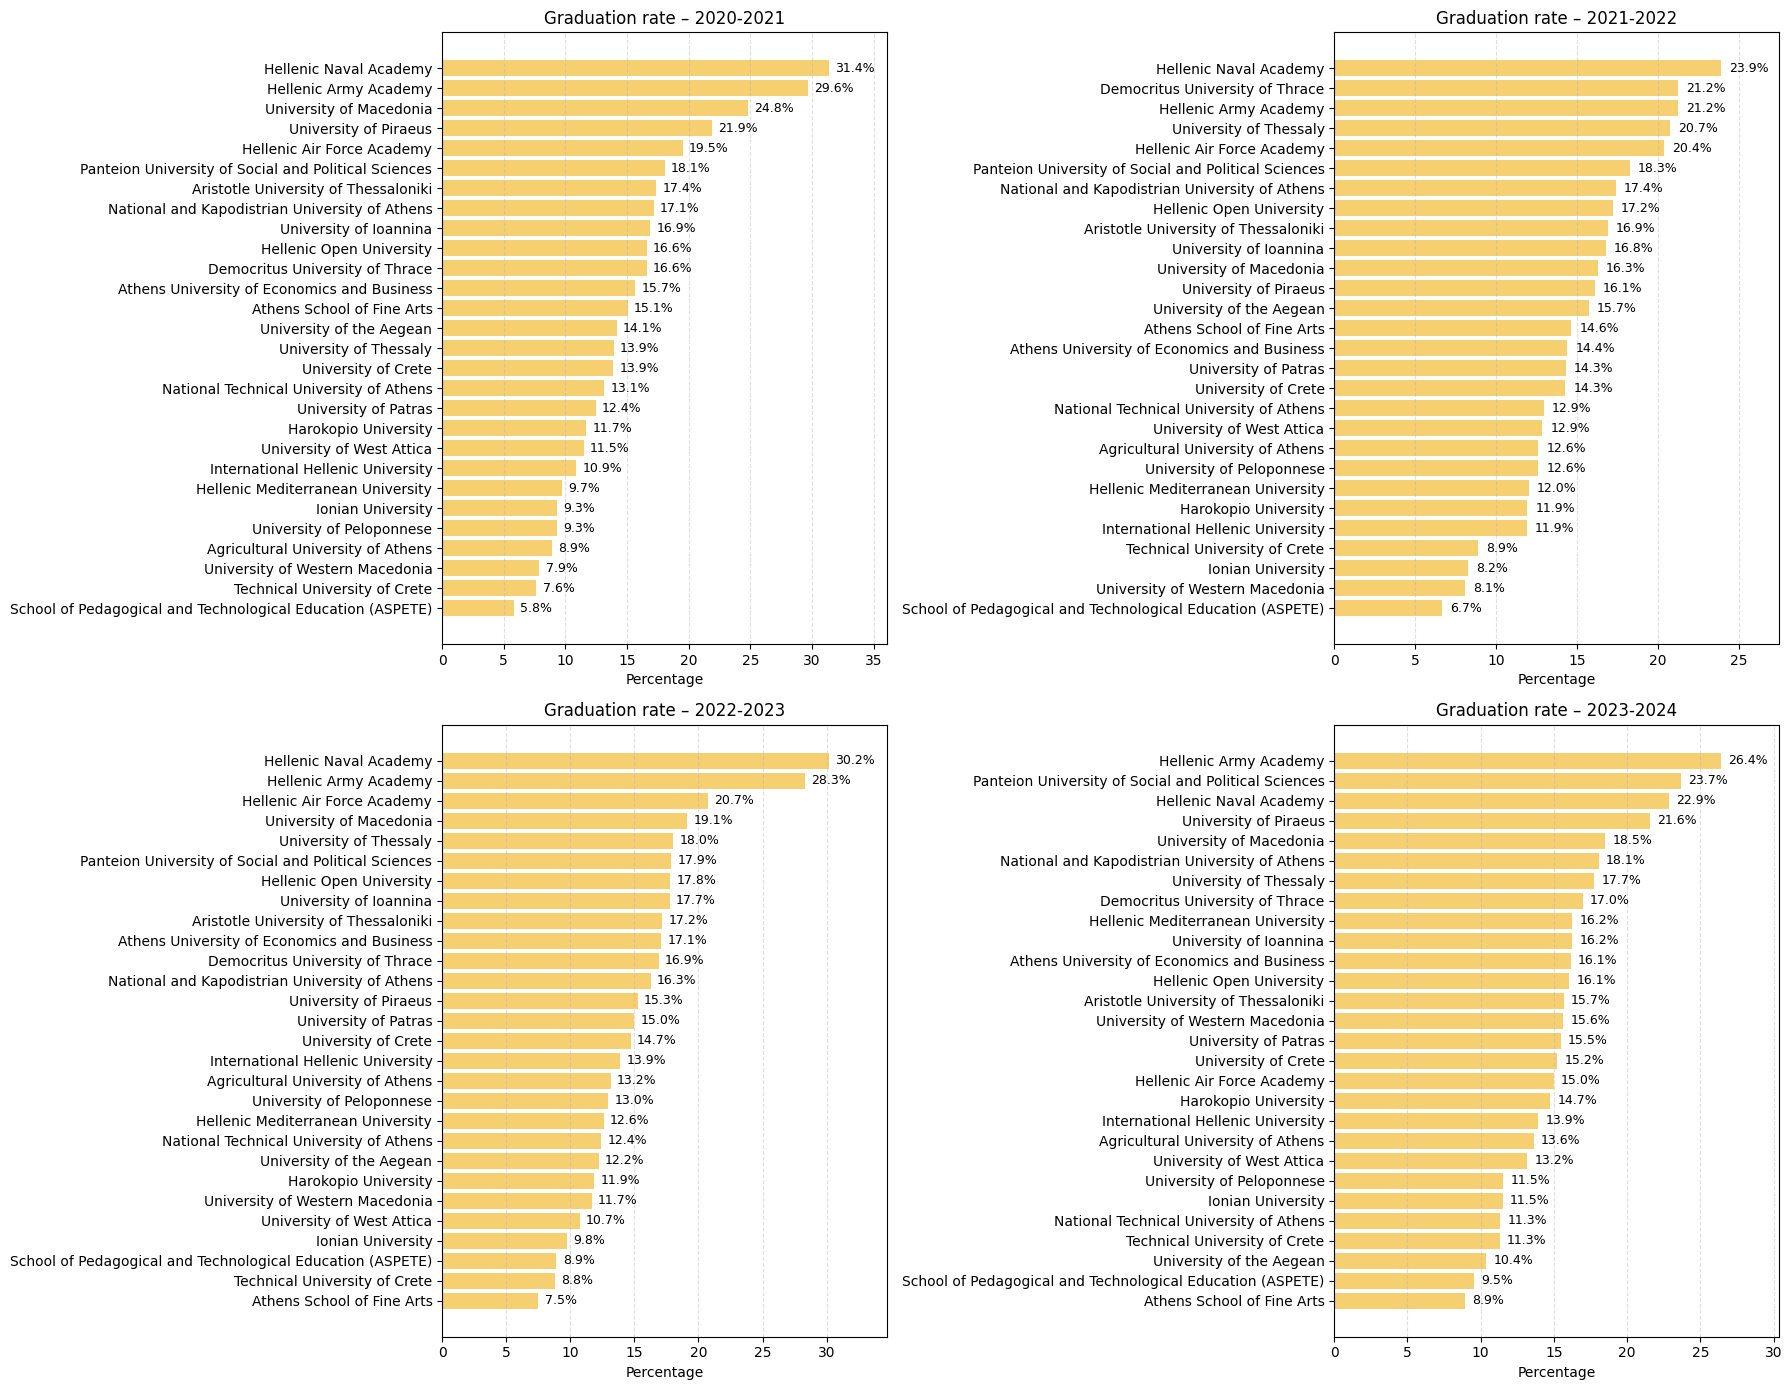

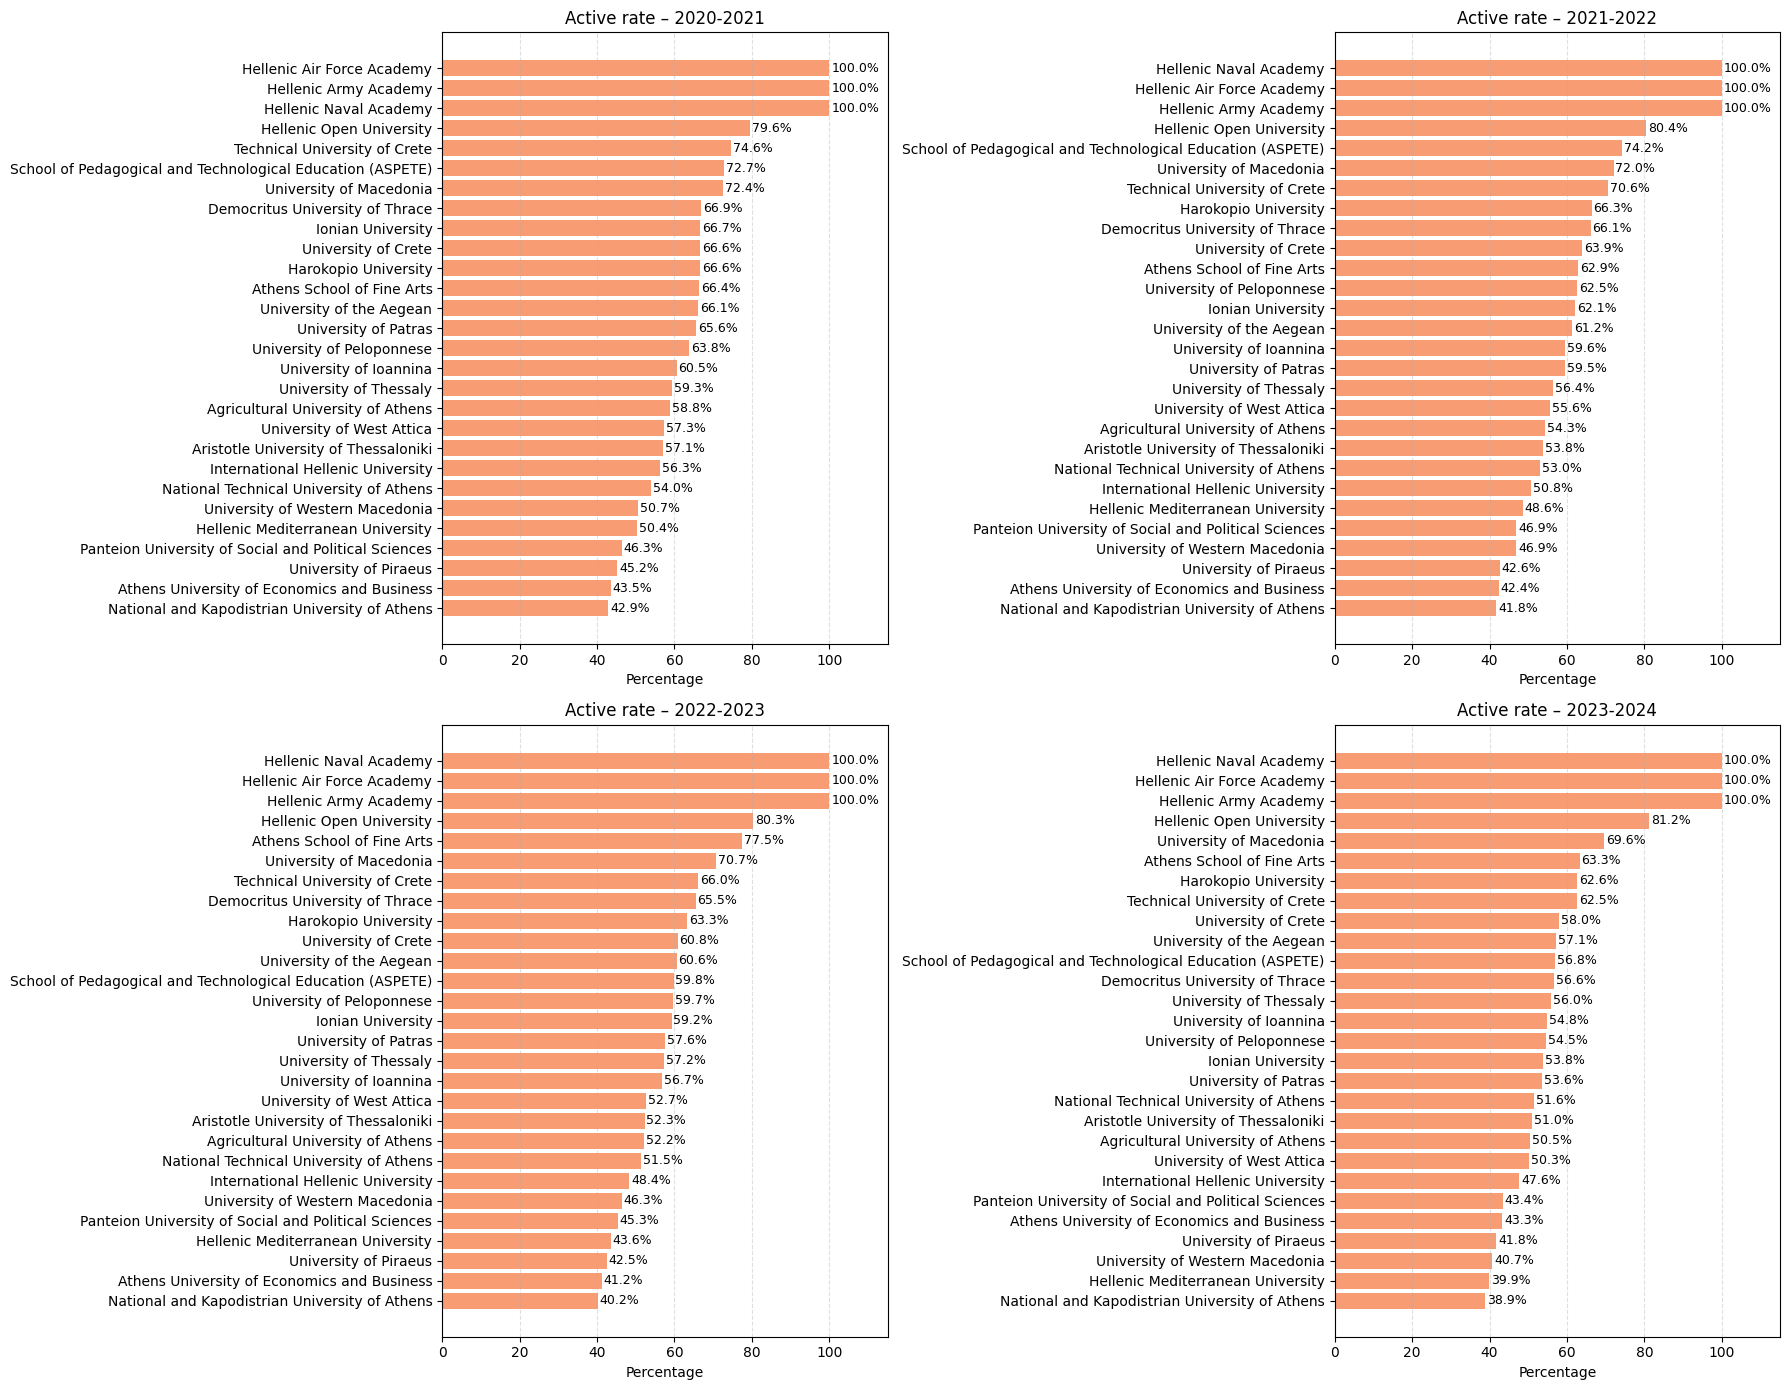

In [64]:
def plot_graduation_rate(df):
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.flatten()

    for ax, year in zip(axes, YEARS):
        df_filtered = (
            df[df["academic_year"] == year]
            .sort_values(by="graduate_rate", ascending=False)
        )

        y_pos = np.arange(len(df_filtered))

        bars = ax.barh(
            y_pos,
            df_filtered["graduate_rate"],
            align="center",
            color=cmap.colors[1]
        )

        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_filtered["institution"])
        ax.invert_yaxis()
        ax.set_xlabel("Percentage")
        ax.set_title(f"Graduation rate – {year}")
        ax.grid(axis="x", linestyle="--", alpha=0.4)

        # Add values next to bars
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,
                bar.get_y() + bar.get_height() / 2,
                f"{width:.1f}%",
                va="center",
                fontsize=9
            )
        max_value = df_filtered["graduate_rate"].max()
        ax.set_xlim(0, max_value * 1.15)

    plt.tight_layout()
    plt.show()


def plot_active_rate(df):
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.flatten()

    for ax, year in zip(axes, YEARS):
        df_filtered = (
            df[df["academic_year"] == year]
            .sort_values(by="active_rate", ascending=False)
        )

        y_pos = np.arange(len(df_filtered))

        bars = ax.barh(
            y_pos,
            df_filtered["active_rate"],
            align="center",
            color=cmap.colors[2]
        )

        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_filtered["institution"])
        ax.invert_yaxis()
        ax.set_xlabel("Percentage")
        ax.set_title(f"Active rate – {year}")
        ax.grid(axis="x", linestyle="--", alpha=0.4)

        # Add values next to bars
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,
                bar.get_y() + bar.get_height() / 2,
                f"{width:.1f}%",
                va="center",
                fontsize=9
            )
        max_value = df_filtered["active_rate"].max()
        ax.set_xlim(0, max_value * 1.15)

    plt.tight_layout()
    plt.show()


plot_graduation_rate(df_grouped_rates)
plot_active_rate(df_grouped_rates)

Pearson correlation (age vs graduate_rate) for 2020-2021: 0.363
  Moderate correlation detected.
Pearson correlation (age vs graduate_rate) for 2021-2022: 0.254
  Weak or no correlation detected.
Pearson correlation (age vs graduate_rate) for 2022-2023: 0.315
  Moderate correlation detected.
Pearson correlation (age vs graduate_rate) for 2023-2024: 0.388
  Moderate correlation detected.


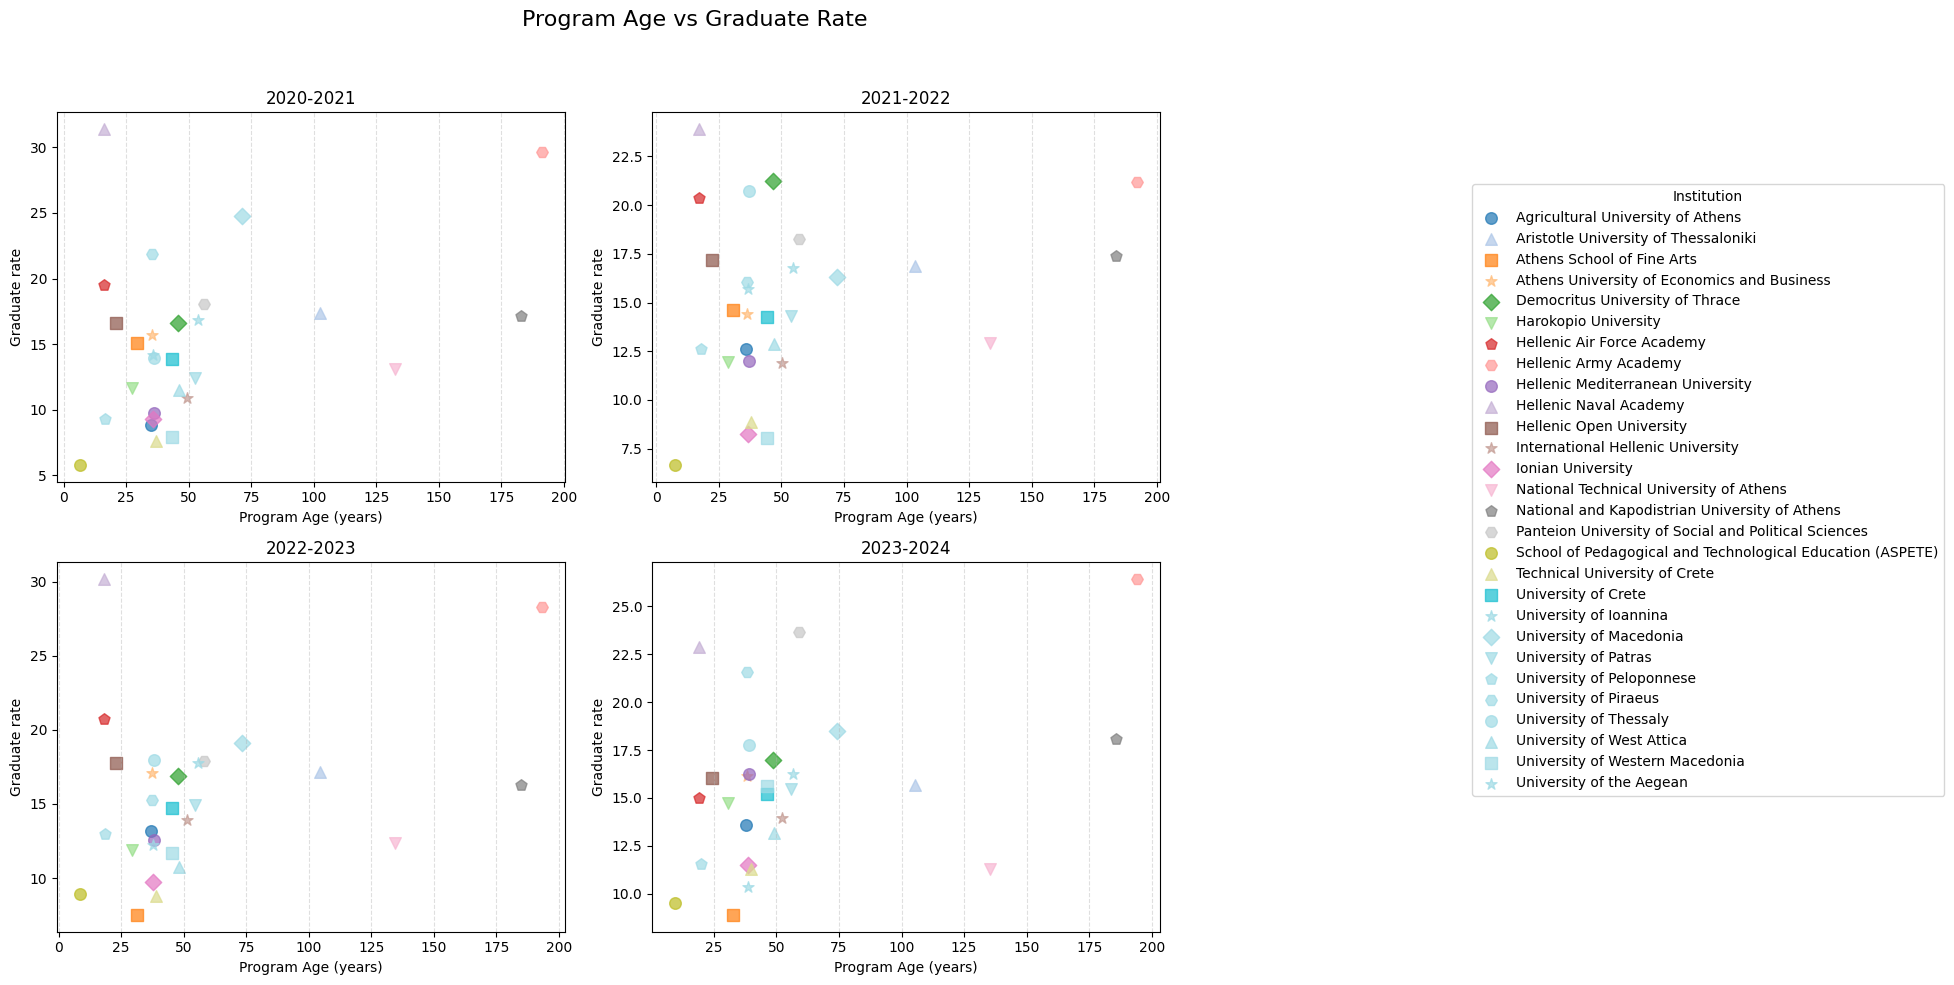

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b5ca39032a0>


In [77]:
from scipy.stats import pearsonr

def plot_scatter_plot(df):
    markers = ["o", "^", "s", "*", "D", "v", "p", "H"]
    colors = plt.colormaps.get_cmap("tab20")
    rate = 'graduate_rate'  # Only this rate

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, year in enumerate(YEARS):
        ax = axes[i]
        df_filtered = df[df["academic_year"] == year].copy()

        # Compute program age
        df_filtered['age'] = (
            pd.to_datetime(df_filtered['academic_year'].str.split('-').str[0], format="%Y")
            - pd.to_datetime(df_filtered['established'], format="%d/%m/%Y")
        ) / pd.Timedelta(days=365.25)

        for j, (inst, group) in enumerate(df_filtered.groupby('institution')):
            ax.scatter(
                group['age'],
                group[rate],
                alpha=0.7,
                label=inst if i == 0 else "",  # Only label once for legend
                color=colors(j),
                marker=markers[j % len(markers)],
                s=70
            )

        ax.set_title(f"{year}")
        ax.set_xlabel("Program Age (years)")
        ax.set_ylabel(rate.replace('_', ' ').capitalize())
        ax.grid(axis="x", linestyle="--", alpha=0.4)

        # Calculate Pearson correlation
        x = df_filtered['age'].to_numpy()
        y = df_filtered[rate].to_numpy()
        mask = ~np.isnan(x) & ~np.isnan(y)
        if mask.sum() > 1:  # Need at least 2 points
            corr, _ = pearsonr(x[mask], y[mask])
            print(f"Pearson correlation (age vs {rate}) for {year}: {corr:.3f}")
            # Print message about correlation strength
            if abs(corr) >= 0.7:
                print("  Strong correlation detected!")
            elif abs(corr) >= 0.3:
                print("  Moderate correlation detected.")
            else:
                print("  Weak or no correlation detected.")
        else:
            print(f"Not enough data to compute Pearson correlation for {year}")

    # Combine legend outside the plots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Institution", bbox_to_anchor=(1.05, 0.5), loc='center left')
    fig.suptitle(f"Program Age vs {rate.replace('_', ' ').title()}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
    plt.show()
# Call the function
plot_scatter_plot(df_grouped_rates)


In [ ]:
df_overall = df.groupby("academic_year", as_index=False)[["graduate", "registered", "enrolled", "active"]].sum()
df_overall["gradaute_rate"] = (df_overall["graduate"] / df_overall["active"]) * 100
df_overall["active_rate"] = (df_overall["active"] / df_overall["registered"]) * 100
df_overall

In [ ]:
def plot_sorted_bar_chart(df_grouped, metric_column):
    for year in YEARS:
        df_plot = df_grouped[df_grouped['academic_year'] == year].copy()
    
        df_plot = df_plot.sort_values(by=metric_column, ascending=True)
    
        y_values = df_plot[metric_column]
        x_positions = np.arange(len(df_plot))
        institution_labels = df_plot['institution']
    
        plt.figure(figsize=(10, 10))

        bar_container = plt.bar(
            x_positions,
            y_values,
            color='skyblue',
            label=metric_column.replace('_', ' ').title()
        )
    
        plt.xticks(
            x_positions,
            institution_labels,
            rotation=45,
            ha='right'
        )
    
        for bar in bar_container:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.,
                height + 0.5,
                f'{int(height)}',
                ha='center',
                va='bottom',
                rotation=45,
                fontsize=8
            )

        plt.title(f'{metric_column.replace("_", " ").title()} Students per Institution in {year}', fontsize=16)
        plt.xlabel('Institution', fontsize=12)
        plt.ylabel('Number of Students', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
        plt.tight_layout()
        plt.show()

In [ ]:
plot_sorted_bar_chart(df_grouped, "registered")

In [ ]:
df["graduation_rate"] = (df["graduate"] / df["active"]) * 100

df["graduation_rate"] = df.apply(
    lambda row: (row["graduate"] / row["active"] if row["active"] != 0 and row["graduate"] <= row["active"] else np.nan) * 100,
    axis=1
)
df["graduation_rate"] = np.where(df["graduation_rate"] > 100, 100, df["graduation_rate"])
df

### Graduation rate per programme (per academic year)

The formula for the Graduation Rate is defined as:

$\text{Graduation Rate} = \left( \frac{\text{Graduates}}{\text{Active Students}} \right) \times 100$.

Besides the standard constraint of division by zero, the code ensures that the number of graduates is not larger than the number of active students.

Hence, large, unrational percentages are avoided.

### Mean of Graduation Rate & Standard Deviation per Institution

In [ ]:
summary = df.groupby("institution")["graduation_rate"].agg(
    mean="mean",
    std=lambda x: np.std(x, ddof=1)
)
print(summary)

### Efficient Frontier

In [ ]:
plt.figure(figsize=(8,5))

cmap = plt.colormaps["tab20c"].resampled(len(summary))
colors = [cmap(i) for i in range(len(summary))]
markers = ["o", "^", "s", "*", "D", "v", "p", "H"]

for i, institution in enumerate(summary.index):
    plt.scatter(
        summary["std"].iloc[i],
        summary["mean"].iloc[i],
        color=colors[i],
        marker=markers[i % len(markers)],
        label=institution,
        s=100
    )

plt.ylabel("Mean (Return)")
plt.xlabel("Standard Deviation (Risk)")
plt.title("Graduation Rate: Mean vs Standard Deviation per Institution")
plt.suptitle("Efficient Frontier")
plt.grid(True)
plt.legend(title="Institution", bbox_to_anchor=(1.05, 1), loc='upper left')   
plt.show()

In [ ]:
import numpy as np

# Identify efficient (Pareto-optimal) institutions
efficient = []

for i in range(len(summary)):
    dominated = False
    for j in range(len(summary)):
        if (
            summary["mean"].iloc[j] >= summary["mean"].iloc[i]
            and summary["std"].iloc[j] <= summary["std"].iloc[i]
            and (summary["mean"].iloc[j] > summary["mean"].iloc[i]
                 or summary["std"].iloc[j] < summary["std"].iloc[i])
        ):
            dominated = True
            break
    efficient.append(not dominated)

summary["efficient"] = efficient

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

# All institutions (background)
plt.scatter(
    summary["std"],
    summary["mean"],
    color="lightgrey",
    s=60,
    label="Non-efficient"
)

# Efficient institutions
plt.scatter(
    summary.loc[summary["efficient"], "std"],
    summary.loc[summary["efficient"], "mean"],
    color="crimson",
    s=120,
    label="Efficient institutions"
)

# Annotate efficient institutions
for inst, row in summary[summary["efficient"]].iterrows():
    plt.annotate(
        inst,
        (row["std"], row["mean"]),
        textcoords="offset points",
        xytext=(6, 6),
        fontsize=9
    )

plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Mean Graduation Rate (Return)")
plt.title("Graduation Rate Efficient Frontier")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

